In [281]:

from jyquickhelper import add_notebook_menu
add_notebook_menu(menu_id="main_menu")

# **PARTIE A : Analyse et prétraitements**

## 01. Importer les libraries ou API de travail

### 01.1. Libraries Analyse

In [285]:
#ANALYSE DE DONNEES
import numpy as np  #manipulation des tableaux et calculs scientifiques 
import pandas as pd # manipulation, nettoyage, analyse de bases de donnees (documentation de 3707 pages!)

#VISUALISATION
import seaborn as sns #visualisation de donnees avec python
import matplotlib.pylab as plt #visualisation de donnees avec python

#DECISION (loi de probabilités: plus de 180 lois (une dizaine pour vous))
import scipy as sp    #faire de la statistique decisionnelle, probabilités, algebre, optimation


### 01.2. Libraries serie temporelle

In [287]:

import statsmodels as stm  #series temporelles (STATISTIQUES: ARIMA, SMOOTHING)

#import neuralprophet (facebook DEEP LERANING)
#import tensorflow (google DEEP LEARNING) 


In [288]:
import warnings   #ignorer les avertissement et conseils
warnings.filterwarnings('ignore')

### 01.3. Data Acces

In [290]:
import yfinance as yf

# Liste des symboles boursiers des entreprises
stocks = ["META", "NVDA", "AMZN", "TSLA","AAPL","GOOG"]

# Période et intervalle de récupération des données
start_date = "2020-01-01"
end_date = "2025-01-01"

# Télécharger les données historiques
data = yf.download(stocks, start=start_date, end=end_date)

[*********************100%***********************]  6 of 6 completed


In [291]:
print(data.head(-10))

Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NVDA   
Date                                                                     
2020-01-02   72.716072   94.900497   68.046196  208.795929    5.972161   
2020-01-03   72.009117   93.748497   67.712280  207.691147    5.876571   
2020-01-06   72.582909   95.143997   69.381874  211.602722    5.901217   
2020-01-07   72.241554   95.343002   69.338585  212.060562    5.972660   
2020-01-08   73.403648   94.598503   69.884995  214.210434    5.983862   
...                ...         ...         ...         ...         ...   
2024-12-10  247.497879  225.039993  186.317734  618.270813  135.057587   
2024-12-11  246.219284  230.259995  196.486160  631.608093  139.297180   
2024-12-12  247.687683  228.970001  193.409653  629.721313  137.327362   
2024-12-13  247.857483  227.460007  191.162216  619.299011  134.237656   
2024-12-16  250.764282  232.929993  19

In [292]:
''' Réinitialiser l'index pour récupérer la colonne "Date"
data.reset_index(inplace=True)
data'''

' Réinitialiser l\'index pour récupérer la colonne "Date"\ndata.reset_index(inplace=True)\ndata'

In [293]:
data.sample(5)  #R sample(data,10)  echantillon

Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NVDA   
Date                                                                     
2020-12-02  120.222198  160.176498   90.966637  286.171234   13.504978   
2024-11-07  226.980438  210.050003  181.866241  590.697632  148.856064   
2023-02-07  152.872543  102.110001  107.530685  190.721115   22.154848   
2021-11-12  147.410568  176.257507  148.940048  339.290955   30.333035   
2023-04-24  163.679306  106.209999  106.276619  211.791809   27.024450   

Price                         High                                      ...  \
Ticker            TSLA        AAPL        AMZN        GOOG        META  ...   
Date                                                                    ...   
2020-12-02  189.606674  120.505466  161.600006   91.349824  290.411260  ...   
2024-11-07  296.910004  227.379569  212.250000  182.165564  593.792356  ...   
2023-02-07  196.809998  153.445879  102.410004  108.157713  192.870986  ...   
2021-11-12  344.473328  147.813506  177.036499  149.153044  340.256375  ...   
2023-04-24  162.550003  163.946615  109.230003  106.814074  212.916513  ...   

Price             Open                                        Volume  \
Ticker            GOOG        META        NVDA        TSLA      AAPL   
Date                                                                   
2020-12-02   89.481172  284.021363   13.311544  185.479996  89004200   
2024-11-07  178.703439  575.912723  146.366459  288.890015  42137700   
2023-02-07  103.141471  184.709455   21.364495  196.429993  83322600   
2021-11-12  147.134604  328.631172   29.953748  349.166656  63804000   
2023-04-24  105.550065  212.677634   26.995470  164.649994  41949600   

Price                                                            
Ticker           AMZN      GOOG      META       NVDA       TSLA  
Date                                                             
2020-12-02   62586000  24440000  17361600  283360000  143327100  
2024-11-07   52878400  16730400  14653700  207323300  117309200  
2023-02-07  119501300  33738800  47080700  664150000  186010300  
2021-11-12   53788000  17048000  25414300  413054000   76719300  
2023-04-24   69575600  21410900  15750900  339282000  140006600  

[5 rows x 30 columns]

### 01.4. Data Infos

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (Close, AMZN)   1258 non-null   float64
 2   (Close, GOOG)   1258 non-null   float64
 3   (Close, META)   1258 non-null   float64
 4   (Close, NVDA)   1258 non-null   float64
 5   (Close, TSLA)   1258 non-null   float64
 6   (High, AAPL)    1258 non-null   float64
 7   (High, AMZN)    1258 non-null   float64
 8   (High, GOOG)    1258 non-null   float64
 9   (High, META)    1258 non-null   float64
 10  (High, NVDA)    1258 non-null   float64
 11  (High, TSLA)    1258 non-null   float64
 12  (Low, AAPL)     1258 non-null   float64
 13  (Low, AMZN)     1258 non-null   float64
 14  (Low, GOOG)     1258 non-null   float64
 15  (Low, META)     1258 non-null   float64
 16  (Low, NVDA)     1258 non-null   float64
 17  (Low, TSLA)    

In [296]:
data.columns   #colnames(data) avec R

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NVDA'),
            ( 'Close', 'TSLA'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NVDA'),
            (  'High', 'TSLA'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NVDA'),
            (   'Low', 'TSLA'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NVDA'),
            (  'Open', 'TSLA'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NVDA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [297]:
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [298]:
# Statistiques générales
print(data.describe())

Price         Close                                                      \
Ticker         AAPL         AMZN         GOOG         META         NVDA   
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     152.177631   146.713811   119.378431   300.201975    38.442412   
std       42.073135    32.004698    32.792881   124.811960    38.230364   
min       54.449894    81.820000    52.581951    88.492935     4.891976   
25%      126.946339   121.000000    93.745979   208.808372    13.571984   
50%      150.761024   153.872498   120.446507   279.597244    21.235977   
75%      176.831444   170.000000   141.025764   345.285149    45.622283   
max      258.735504   232.929993   197.934509   631.608093   148.856064   

Price                       High                                         ...  \
Ticker         TSLA         AAPL         AMZN         GOOG         META  ...   
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000  ...   
mean     

### 01.5. Caractéristiques clés, valeurs manquantes et données aberrantes

In [300]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

Price   Ticker
Close   AAPL      0
        AMZN      0
        GOOG      0
        META      0
        NVDA      0
        TSLA      0
High    AAPL      0
        AMZN      0
        GOOG      0
        META      0
        NVDA      0
        TSLA      0
Low     AAPL      0
        AMZN      0
        GOOG      0
        META      0
        NVDA      0
        TSLA      0
Open    AAPL      0
        AMZN      0
        GOOG      0
        META      0
        NVDA      0
        TSLA      0
Volume  AAPL      0
        AMZN      0
        GOOG      0
        META      0
        NVDA      0
        TSLA      0
dtype: int64


In [301]:
#données dupliquées
data.duplicated().sum()

0

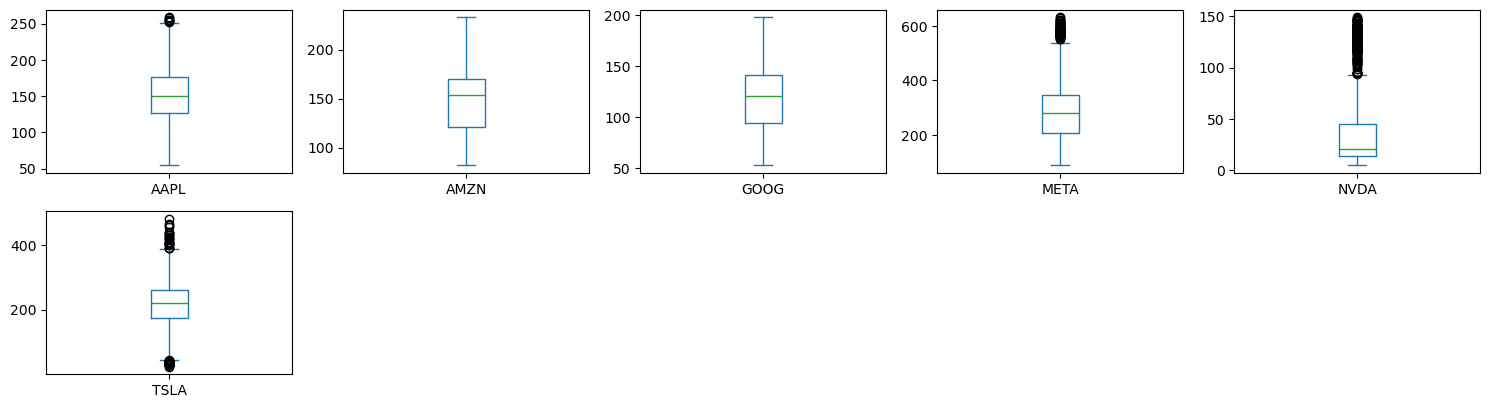

In [302]:
#visualisation des données aberrantes
import matplotlib.pyplot as plt

# Création des boxplots pour chaque colonne
data['Close'].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [303]:
#traitement des valeurs abberantes
df = data['Close']
q1=df.quantile(0.25)
q3=df.quantile(0.75)
low=q1-1.5*(q3-q1)
high=q3+1.5*(q3-q1)

#il faut quantifier les données aberrantes pour chaque variable
taux_valeur_aberrante=((df<low) |(df>high)).sum()/df.shape[0]*100

# taux_valeur_aberrante = taux_valeur_aberrante.drop('date', axis=1)
taux_valeur_aberrante

Ticker
AAPL     0.556439
AMZN     0.000000
GOOG     0.000000
META     5.723370
NVDA    12.718601
TSLA     5.564388
dtype: float64

<Axes: xlabel='Ticker'>

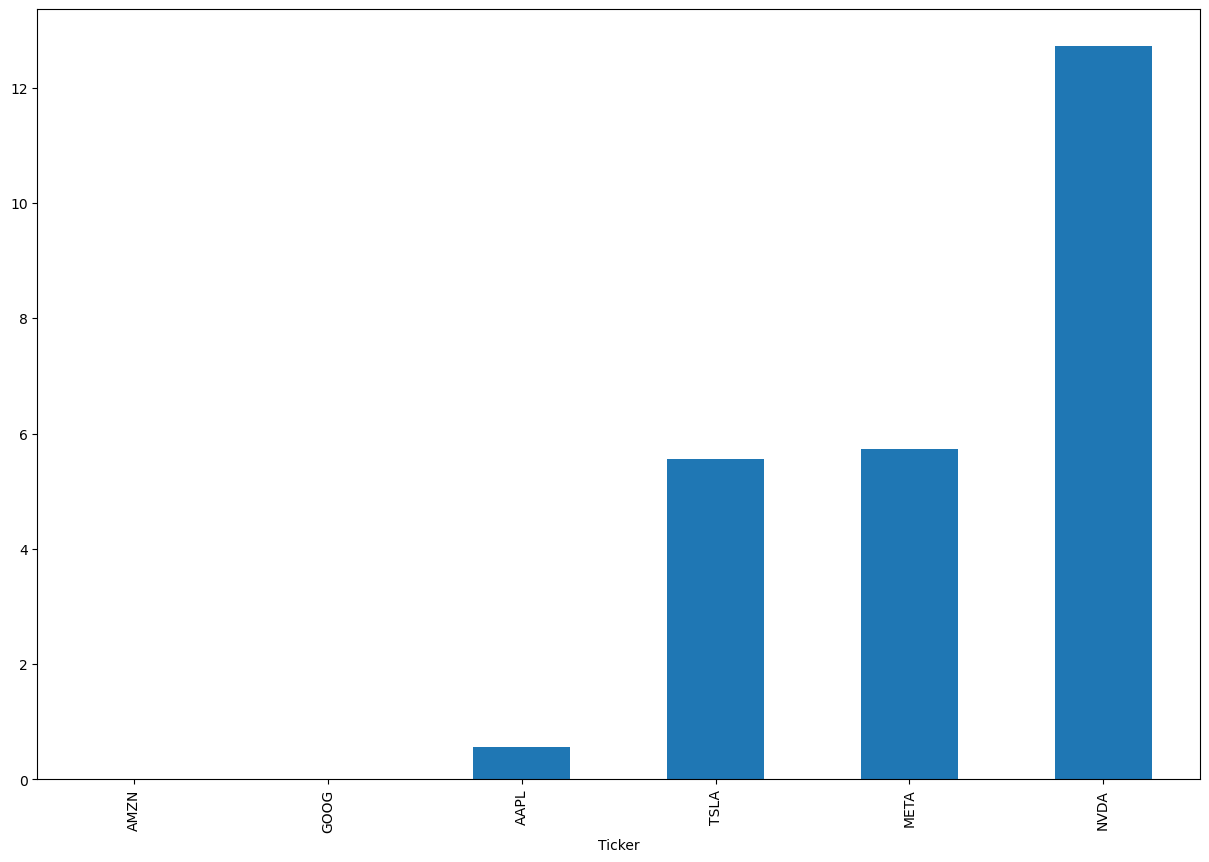

In [304]:
#Visualisation en barres des taux de valeurs aberantes de chaque variable
taux_valeur_aberrante.sort_values().plot(kind="bar", figsize=(15,10))

In [305]:
#Remplacer les valeurs abberantes par la médiane

df = data['Close'].copy()  # Copie pour éviter de modifier l'original

# Boucle sur chaque colonne pour traiter les valeurs aberrantes
for col in df.columns:
    q1 = df[col].quantile(0.25)  # Premier quartile (Q1)
    q3 = df[col].quantile(0.75)  # Troisième quartile (Q3)
    iqr = q3 - q1  # Intervalle interquartile
    
    low = q1 - 1.5* iqr  # Seuil inférieur
    high = q3 + 1.5 * iqr  # Seuil supérieur
    
    # Remplacement des valeurs aberrantes par la médiane de la colonne
    median_value = df[col].median()
    df[col] = df[col].apply(lambda x: median_value if x < low or x > high else x)

# Vérification du résultat
print(df.describe())

Ticker         AAPL         AMZN         GOOG         META         NVDA  \
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     151.596583   146.713811   119.378431   282.798507    25.191941   
std       41.360695    32.004698    32.792881   103.318258    18.359852   
min       54.449894    81.820000    52.581951    88.492935     4.891976   
25%      126.946339   121.000000    93.745979   208.808372    13.571984   
50%      150.747753   153.872498   120.446507   279.554939    21.230170   
75%      176.293404   170.000000   141.025764   331.517555    27.624919   
max      250.764282   232.929993   197.934509   538.481567    92.638557   

Ticker         TSLA  
count   1258.000000  
mean     216.655989  
std       70.401474  
min       45.266666  
25%      180.552494  
50%      220.220001  
75%      256.590004  
max      387.646667  


In [306]:
'''from scipy.stats import trim_mean

df = data['Close'].copy()

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 4.5 * iqr
    high = q3 + 4.5* iqr
    
    # Calculer la moyenne tronquée (en enlevant les valeurs aberrantes)
    filtered_values = df[col][(df[col] >= low) & (df[col] <= high)]
    trimmed_mean_value = trim_mean(filtered_values, proportiontocut=0.1)  # Supprime 10% des extrêmes
    
    # Remplacement des valeurs aberrantes
    df[col] = df[col].apply(lambda x: trimmed_mean_value if x < low or x > high else x)

print(df.describe())'''


"from scipy.stats import trim_mean\n\ndf = data['Close'].copy()\n\nfor col in df.columns:\n    q1 = df[col].quantile(0.25)\n    q3 = df[col].quantile(0.75)\n    iqr = q3 - q1\n    \n    low = q1 - 4.5 * iqr\n    high = q3 + 4.5* iqr\n    \n    # Calculer la moyenne tronquée (en enlevant les valeurs aberrantes)\n    filtered_values = df[col][(df[col] >= low) & (df[col] <= high)]\n    trimmed_mean_value = trim_mean(filtered_values, proportiontocut=0.1)  # Supprime 10% des extrêmes\n    \n    # Remplacement des valeurs aberrantes\n    df[col] = df[col].apply(lambda x: trimmed_mean_value if x < low or x > high else x)\n\nprint(df.describe())"

In [307]:
# Explications
"""
📊 Réduit l'impact des valeurs aberrantes qui pourraient biaiser l'analyse.
🎯 Fournit une estimation plus robuste que la moyenne classique.
✅ Utilisée en statistique robuste, notamment en finance et en traitement des signaux.
"""

"\n📊 Réduit l'impact des valeurs aberrantes qui pourraient biaiser l'analyse.\n🎯 Fournit une estimation plus robuste que la moyenne classique.\n✅ Utilisée en statistique robuste, notamment en finance et en traitement des signaux.\n"

In [308]:
#Vérifications

taux_valeur_aberrante=((df<low) |(df>high)).sum()/df.shape[0]*100
taux_valeur_aberrante

Ticker
AAPL     0.000000
AMZN     0.000000
GOOG     0.000000
META    12.957075
NVDA    86.565978
TSLA     0.000000
dtype: float64

In [309]:
#Utilisation de Z score pour la gestion des anomalies
'''
from scipy.stats import zscore
import numpy as np

# Calcul des Z-scores pour chaque colonne
z_scores = df.apply(zscore)

# Suppression des valeurs aberrantes : on garde uniquement les lignes où toutes les colonnes ont |Z-score| < 3
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Vérification des valeurs aberrantes restantes
outliers = df[~df.index.isin(df_cleaned.index)]  # Les valeurs supprimées sont des outliers

print("Nombre d'anomalies supprimées :", outliers.shape[0])
print(outliers)'''



'\nfrom scipy.stats import zscore\nimport numpy as np\n\n# Calcul des Z-scores pour chaque colonne\nz_scores = df.apply(zscore)\n\n# Suppression des valeurs aberrantes : on garde uniquement les lignes où toutes les colonnes ont |Z-score| < 3\ndf_cleaned = df[(z_scores < 3).all(axis=1)]\n\n# Vérification des valeurs aberrantes restantes\noutliers = df[~df.index.isin(df_cleaned.index)]  # Les valeurs supprimées sont des outliers\n\nprint("Nombre d\'anomalies supprimées :", outliers.shape[0])\nprint(outliers)'

In [310]:
data = df
data

Ticker,AAPL,AMZN,GOOG,META,NVDA,TSLA
Date,,,,,,
2020-01-02,72.716072,94.900497,68.046196,208.795929,5.972161,220.220001
2020-01-03,72.009117,93.748497,67.712280,207.691147,5.876571,220.220001
2020-01-06,72.582909,95.143997,69.381874,211.602722,5.901217,220.220001
2020-01-07,72.241554,95.343002,69.338585,212.060562,5.972660,220.220001
2020-01-08,73.403648,94.598503,69.884995,214.210434,5.983862,220.220001
...,...,...,...,...,...,...
2024-12-24,150.761024,229.050003,197.345184,279.597244,21.235977,220.220001
2024-12-26,150.761024,227.050003,196.875717,279.597244,21.235977,220.220001
2024-12-27,150.761024,223.750000,193.819183,279.597244,21.235977,220.220001


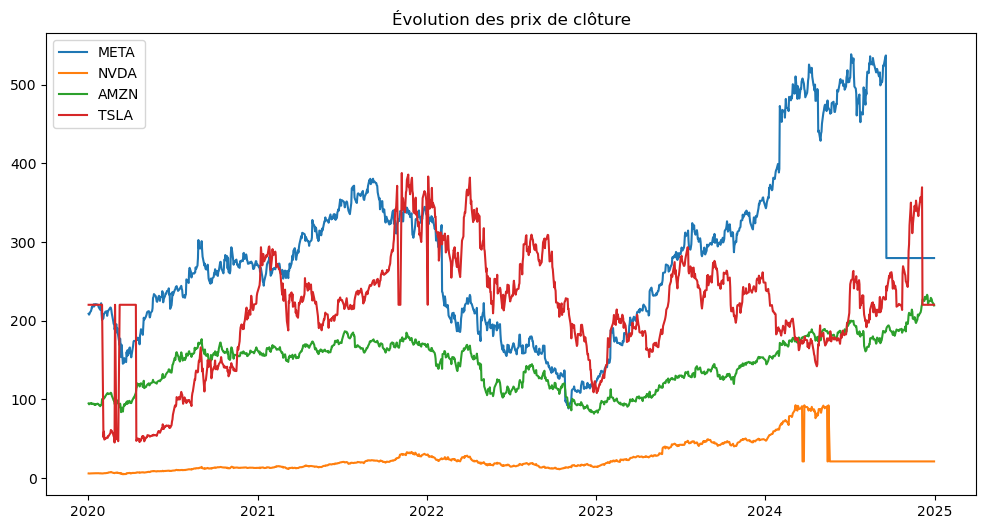

In [311]:
# Visualisation des prix de clôture
plt.figure(figsize=(12, 6))
for stock in ["META", "NVDA", "AMZN", "TSLA","AAPL","GOOG"]:
    plt.plot(data[stock], label=stock)
plt.title("Évolution des prix de clôture")
plt.legend()
plt.show()


## 02. Prétraitement des données 

In [313]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardisation des prix de clôture
scaler = StandardScaler()
data_scaled = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns,
    index=data.index
)

In [314]:
# Vérification des données normalisées
data_scaled.describe()

Ticker,AAPL,AMZN,GOOG,META,NVDA,TSLA
count,1.258000e+03,1.258000e+03,1.258000e+03,1.258000e+03,1.258000e+03,1.258000e+03
mean,-2.711133e-16,2.146314e-16,-1.807422e-16,2.372241e-16,9.037110e-17,6.777832e-17
std,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00
min,-2.349702e+00,-2.028440e+00,-2.037730e+00,-1.881399e+00,-1.106111e+00,-2.435425e+00
25%,-5.962194e-01,-8.037582e-01,-7.819577e-01,-7.164228e-01,-6.331521e-01,-5.130269e-01
50%,-2.053077e-02,2.237651e-01,3.258331e-02,-3.140643e-02,-2.158703e-01,5.064425e-02
75%,5.973459e-01,7.278759e-01,6.603855e-01,4.717310e-01,1.325689e-01,5.674582e-01
max,2.398585e+00,2.694932e+00,2.396475e+00,2.475697e+00,3.675054e+00,2.429760e+00


##  03. Segmentation du marché boursier (Clustering)

In [316]:
'''But de la segmentaton: Aidez les investisseurs à voir si Tesla appartient à un cluster de valeurs à forte croissance ou de valeurs volatiles .
Détectez les moments où Tesla change de comportement par rapport à son cluster habituel.'''

'But de la segmentaton: Aidez les investisseurs à voir si Tesla appartient à un cluster de valeurs à forte croissance ou de valeurs volatiles .\nDétectez les moments où Tesla change de comportement par rapport à son cluster habituel.'

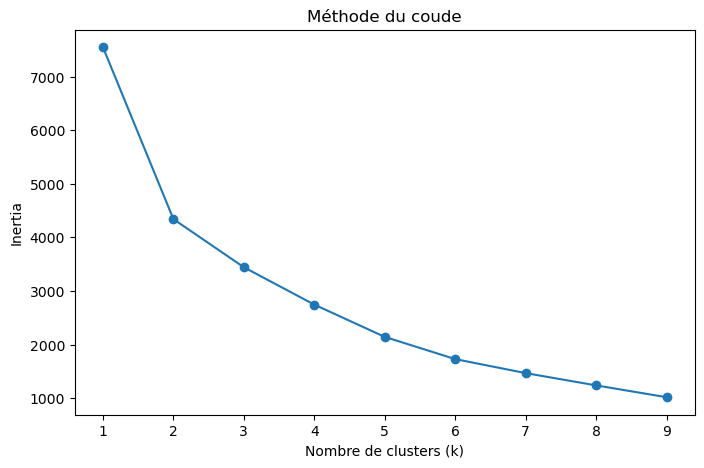

In [317]:
from sklearn.cluster import KMeans

# Déterminer le nombre optimal de clusters (méthode du coude)
inertia = []
K_range = range(1, 10)

data_scaled.fillna(data_scaled.median(), inplace=True)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia")
plt.title("Méthode du coude")
plt.show()

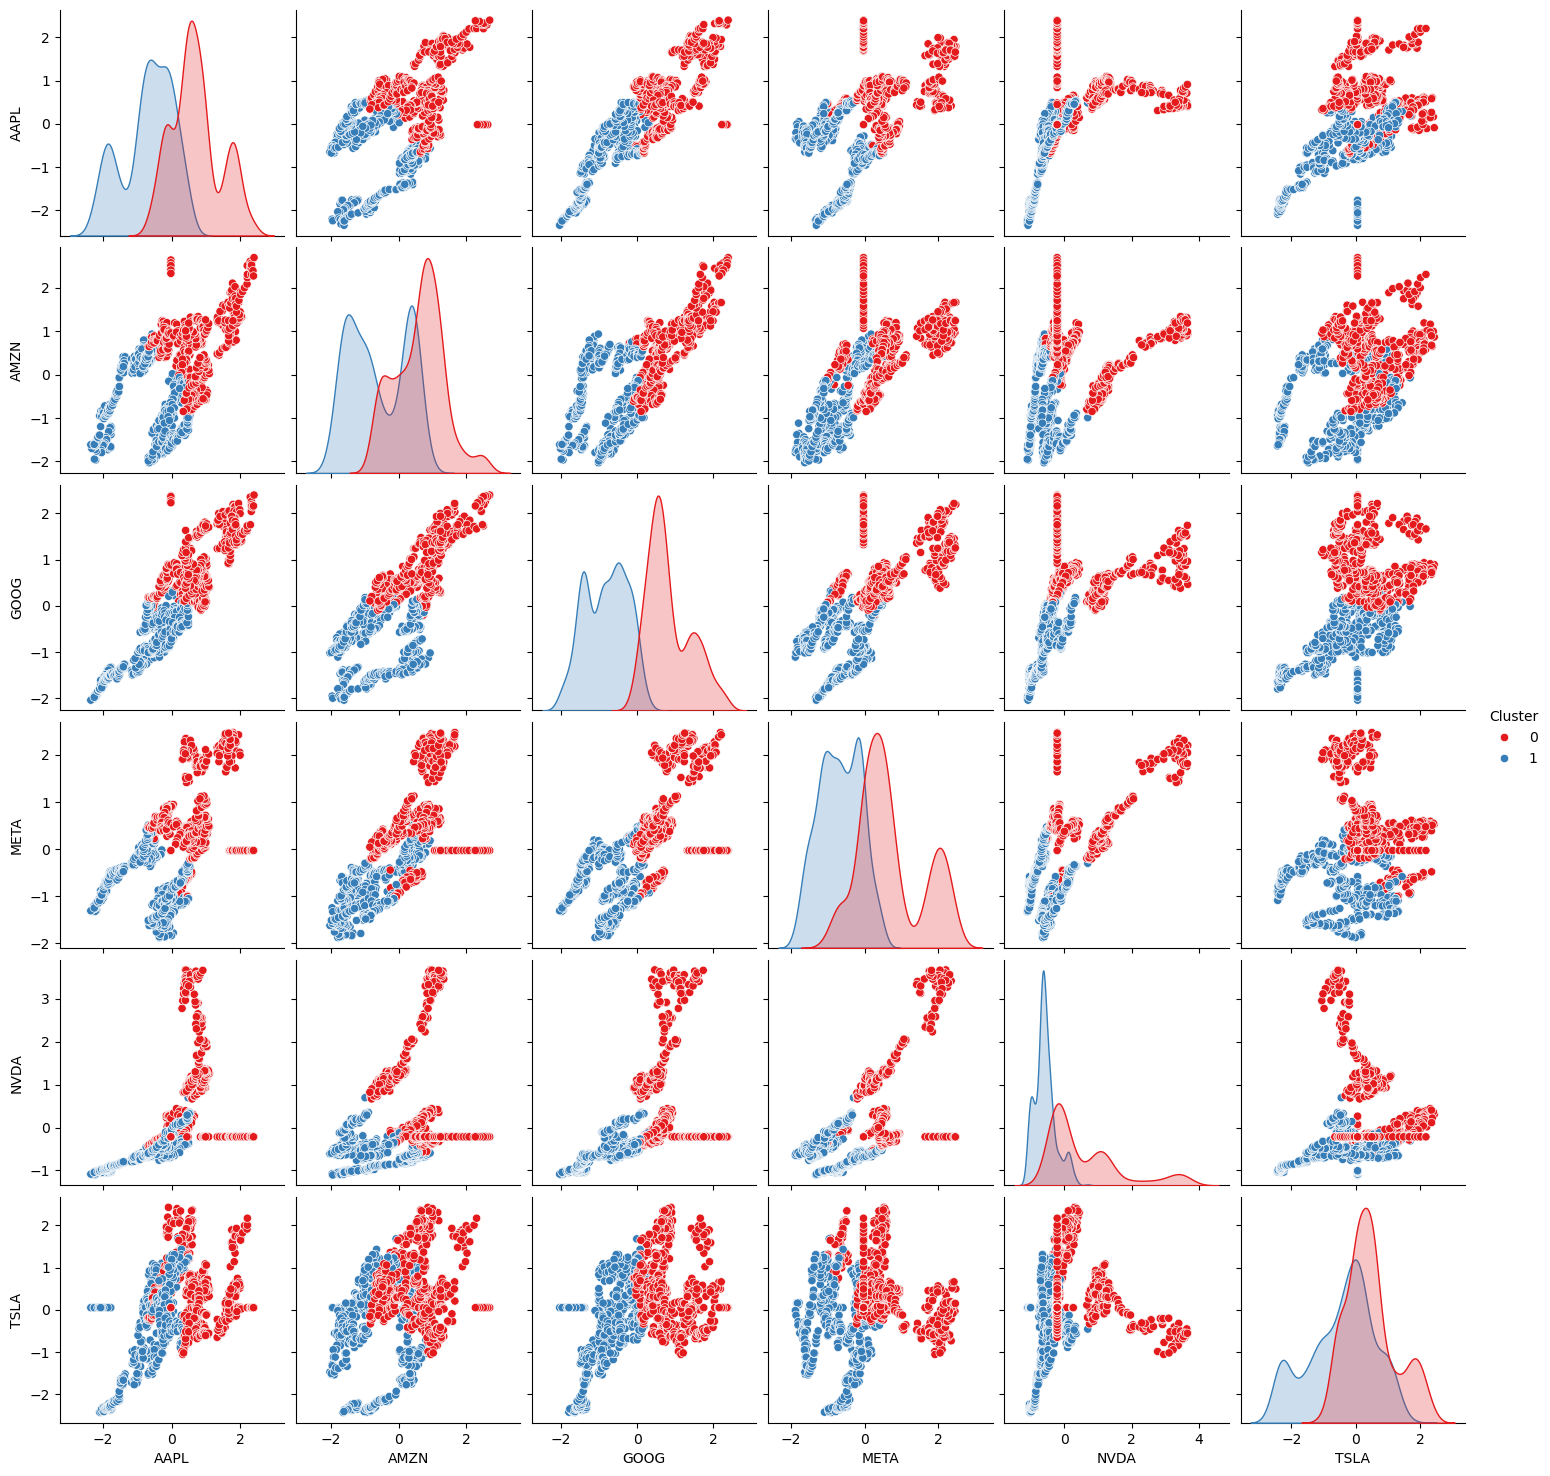

In [318]:
import seaborn as sns

#Exécuter K-Means avec k=2 et analyser les clusters :

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data_scaled["Cluster"] = kmeans.fit_predict(data_scaled)

sns.pairplot(data_scaled, hue="Cluster", palette="Set1")
plt.show()

In [319]:
#Explications
'''
Cluster 0 (Bleu) : Ce cluster représente des valeurs avec une dynamique plus stable .
Cluster 1 (Rouge) : Ce cluster capture des valeurs ayant une plus forte opportunité ou des caractéristiques de croissance rapide .

NVDA et TSLA ont un groupe bien distinct (rouge) , ce qui peut indiquer qu'elles partagent une dynamique de forte disponible ou de croissance rapide .
AMZN et META sont principalement en bleu , ce qui signifie qu'elles pourraient être plus stables ou moins volatiles par rapport à TSLA/NVDA.

Que peut-on en conclure pour Tesla ?
Tesla ( TSLA ) appartient en partie au cluster rouge , ce qui signifie qu'elle suit une tendance similaire à NVDA en termes de disponibilité et de performance.
Le cluster de TESLA suggère qu'elle pourrait être plus proche des valeurs technologiques de croissance que des valeurs plus stables comme AMZN ou META.'''


"\nCluster 0 (Bleu) : Ce cluster représente des valeurs avec une dynamique plus stable .\nCluster 1 (Rouge) : Ce cluster capture des valeurs ayant une plus forte opportunité ou des caractéristiques de croissance rapide .\n\nNVDA et TSLA ont un groupe bien distinct (rouge) , ce qui peut indiquer qu'elles partagent une dynamique de forte disponible ou de croissance rapide .\nAMZN et META sont principalement en bleu , ce qui signifie qu'elles pourraient être plus stables ou moins volatiles par rapport à TSLA/NVDA.\n\nQue peut-on en conclure pour Tesla ?\nTesla ( TSLA ) appartient en partie au cluster rouge , ce qui signifie qu'elle suit une tendance similaire à NVDA en termes de disponibilité et de performance.\nLe cluster de TESLA suggère qu'elle pourrait être plus proche des valeurs technologiques de croissance que des valeurs plus stables comme AMZN ou META."

## ***04. Détection d’anomalies***

In [321]:
from sklearn.ensemble import IsolationForest

# Appliquer Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data_scaled["Anomaly"] = iso_forest.fit_predict(data_scaled)

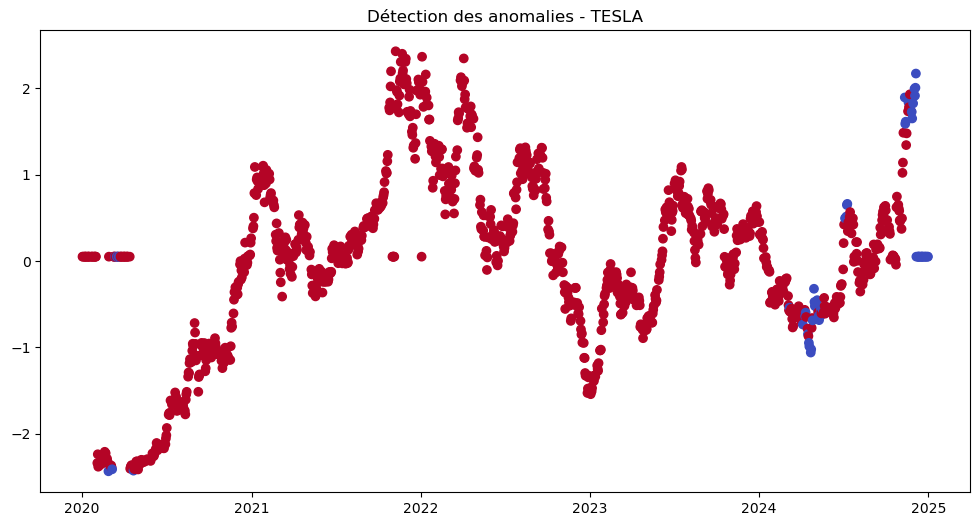

In [322]:
# Visualisation des anomalies de TESLA
plt.figure(figsize=(12, 6))
plt.scatter(data_scaled.index, data_scaled["TSLA"], c=data_scaled["Anomaly"], cmap="coolwarm")
plt.title("Détection des anomalies - TESLA")
plt.show()

In [323]:
# Explications
''' 
Les points rouges (valeur normale) représentent les jours où le modèle estime que le cours de l'action suit une évolution attendue.
Les points bleus (anomalies) correspondent aux 5% de jours considérés comme atypiques, où le prix a fortement fluctué par rapport au reste des données.

Facteurs macroéconomiques
- Annonces de la FED (hausse ou baisse des taux d’intérêt)
- Crises financières (ex : krach de 2020 lié au Covid)
- Inflation, chômage, ou tensions géopolitiques

Événements spécifiques à TESLA

- Résultats financiers trimestriels surprenants (bons ou mauvais)
- Changements de direction (ex : tweets d’Elon Musk influençant l’action)
- Lancements de nouveaux produits (ex : annonces de nouveaux modèles de véhicules ou avancées technologiques)
- Problèmes juridiques ou réglementaires (ex : rappels de véhicules, enquêtes) '''

" \nLes points rouges (valeur normale) représentent les jours où le modèle estime que le cours de l'action suit une évolution attendue.\nLes points bleus (anomalies) correspondent aux 5% de jours considérés comme atypiques, où le prix a fortement fluctué par rapport au reste des données.\n\nFacteurs macroéconomiques\n- Annonces de la FED (hausse ou baisse des taux d’intérêt)\n- Crises financières (ex : krach de 2020 lié au Covid)\n- Inflation, chômage, ou tensions géopolitiques\n\nÉvénements spécifiques à TESLA\n\n- Résultats financiers trimestriels surprenants (bons ou mauvais)\n- Changements de direction (ex : tweets d’Elon Musk influençant l’action)\n- Lancements de nouveaux produits (ex : annonces de nouveaux modèles de véhicules ou avancées technologiques)\n- Problèmes juridiques ou réglementaires (ex : rappels de véhicules, enquêtes) "

# **PARTIE B: Prévisions des actions de TESLA**

### 6.1 Analyse statistique descriptive des actions de Tesla

count    1258.000000
mean      216.655989
std        70.401474
min        45.266666
25%       180.552494
50%       220.220001
75%       256.590004
max       387.646667
Name: TSLA, dtype: float64


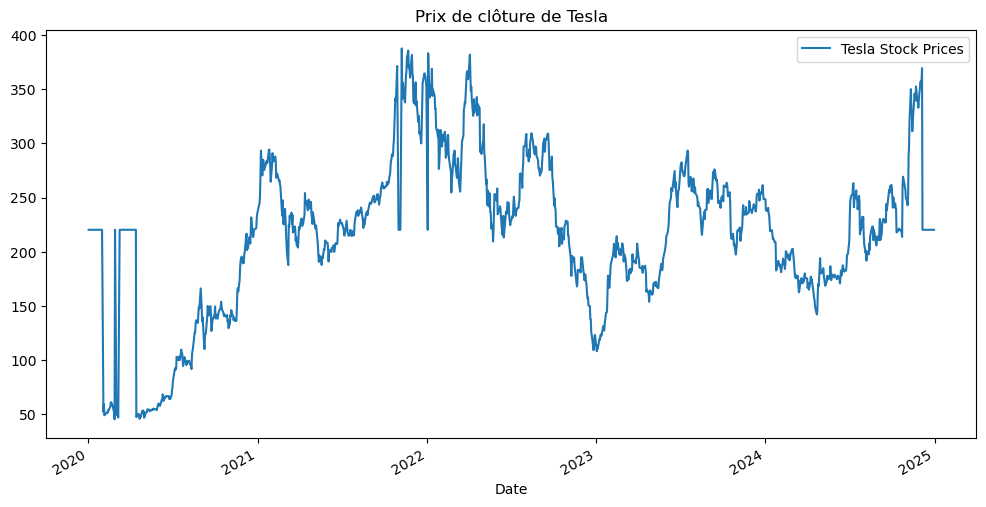

In [326]:
# Analyse descriptive de Tesla (prix de clôture)
tesla_data = data['TSLA']

# Affichage des statistiques de base
print(tesla_data.describe())

# Visualisation de la série temporelle
plt.figure(figsize=(12, 6))
tesla_data.plot(label='Tesla Stock Prices')
plt.title("Prix de clôture de Tesla")
plt.legend()
plt.show()

### 6.2 Test de normalité (ex: Shapiro-Wilk ou test de Jarque-Bera)

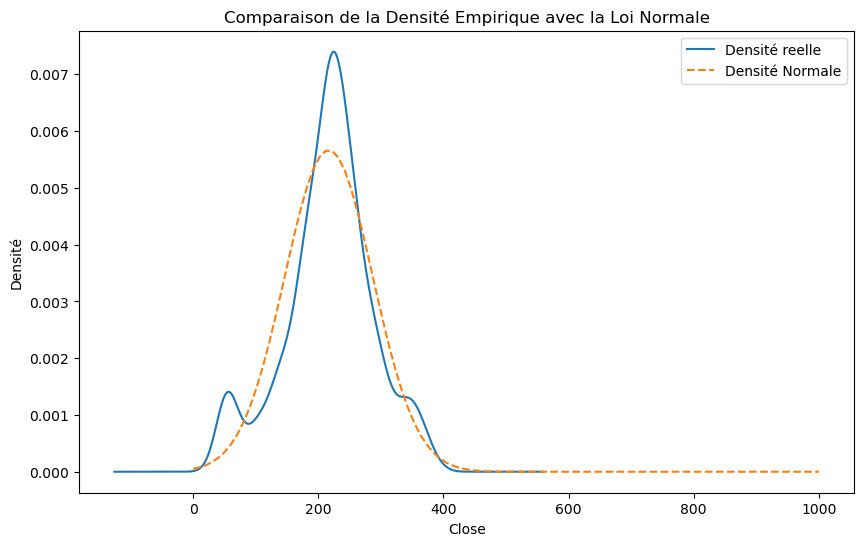

In [328]:
from scipy.stats import norm

# Calcul de la moyenne et de l'écart-type des données
mean = tesla_data.mean()
std = tesla_data.std()

# Génération de valeurs pour l'axe des x
xmin = 0 
xmax = 1000
x = np.linspace(xmin, xmax, 100)

# Calcul de la densité normale
density = norm.pdf(x, mean, std)

# Tracé de la densité des données
tesla_data.plot(kind="density", label='Densité reelle', figsize=(10, 6))

# Ajout de la courbe de la densité normale
plt.plot(x, density, label='Densité Normale', linestyle='--')

# Ajout des légendes et titres
plt.xlabel('Close')
plt.ylabel('Densité')
plt.title('Comparaison de la Densité Empirique avec la Loi Normale')
plt.legend()
plt.show()

##### Pour savoir si les prix de Tesla suivent une distribution normale, on peut utiliser le test de Shapiro-Wilk ou de Jarque-Bera.

In [330]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk pour la normalité
stat, p_value = shapiro(tesla_data)
print(f"Shapiro-Wilk Test p-value: {p_value}")

Shapiro-Wilk Test p-value: 8.695026493367554e-15


###### Explications : Valeur p = 8.69 × 10⁻¹5 (très proche de 0) p-value < 0.05 , on rejette H₀ → les données ne suivent pas une loi normale .

### 6.3 Stationnarité (test de Dickey-Fuller)

###### Les séries temporelles doivent être stationnaires pour effectuer des prédictions fiables. Nous allons appliquer le test de Dickey-Fuller.

In [334]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller
adf_result = adfuller(tesla_data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -3.3062320484898065
p-value: 0.014602189647005057


##### Explications: p-value est inférieur à 0.05, cela signifie que la série temporelle est stationnaire.

### 6.4 Modélisation avancée avec SARIMAX

In [337]:
'''autoarima python: librarie qui permet de choisir les meilleurs parametres pour (p,q,d)(P,D,Q,s) 
order=(p,d,q), 
p=nombre de mois du passé pris en compte pour le modele
q=nombre de residus du passé prises en compte pour le modele
d=le nombre de fois qu'on devrait deriver la serie pour la rendre stationnaire'''

"autoarima python: librarie qui permet de choisir les meilleurs parametres pour (p,q,d)(P,D,Q,s) \norder=(p,d,q), \np=nombre de mois du passé pris en compte pour le modele\nq=nombre de residus du passé prises en compte pour le modele\nd=le nombre de fois qu'on devrait deriver la serie pour la rendre stationnaire"

In [338]:
 #Créez un modèle ARIMA(p,d,q) et analysez ses performances.

#choisir les meilleurs parametres (p,d,q)(P,D,Q)(s) pour le modele

import pmdarima   #(p,d,q)  #(P,D,Q, s) 
y = tesla_data
pmdarima.arima.auto_arima(y,                          
                          start_p=0, max_p=12, #chercher le meilleur parametre p entre 0 et 12
                          start_q=0, max_q=12,
                          start_d=0, max_d=12,  
                          start_P=0, max_P=12,
                          start_Q=0, max_Q=12,
                          start_D=0, max_D=12,  
                          m=12)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(3, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [339]:
#le meilleur modele en terme de precision pourrait etre le modele SARIMA avec les paremetres:
#(p,d,q)(P,D,Q)(s)=(0,1,1)(3,0,0)[12]

In [340]:
# Étendez à un modèle SARIMA(p,d,q)(P,D,Q,S) pour capturer la saisonnalité des prix.

from statsmodels.tsa.statespace.sarimax import SARIMAX

#choix des parametres du modele
p,d,q=0,1,1  # TENDANCE: on prends la close du mois dernier( p=1) et la derniere fluctuation (q=1), on derive pas (d=0)
P,D,Q=3,0,0   # SAISONNALITE: on prends la close des deux dernieres saisons (P=2), pas de fluctuation (Q=0), pas de derivé 
s=12

model = SARIMAX(y, order=(p,d,q), seasonal_order = (P,D,Q, s),  enforce_stationarity=False, 
                enforce_invertibility=False)
#on entraine le modele
results = model.fit()
#les resultats fournis par le modele
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                TSLA   No. Observations:                 1258
Model:             SARIMAX(0, 1, 1)x(3, 0, [], 12)   Log Likelihood               -5101.808
Date:                             Tue, 18 Mar 2025   AIC                          10213.617
Time:                                     21:54:59   BIC                          10239.154
Sample:                                          0   HQIC                         10223.228
                                            - 1258                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2411      0.009    -26.532      0.000      -0.259      -0.223
ar.S.L12      -0.0306      0.047     -0.649      0.516      -0.123       0.062
ar.S.L24      -0.1066      0.010    -10.801      0.000      -0.126      -0.087
ar.S.L36      -0.0412      0.047     -0.877      0.381      -0.133       0.051
sigma2       249.3590      2.188    113.974      0.000     245.071     253.647
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            194271.51
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        64.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [341]:
#Explications
'''
AIC:9037.945 (Akaike Information Criterion, utilisé pour comparer des modèles, plus c'est bas, mieux c'est)
BIC: 9053.355 (Bayesian Information Criterion, même logique que AIC)

Kurtosis > 3 → Distribution leptocurtique (queues épaisses, plus de valeurs extrêmes).
Skewness < 0 (négative) → Queue à gauche (distribution étalée vers les valeurs faibles).
'''

"\nAIC:9037.945 (Akaike Information Criterion, utilisé pour comparer des modèles, plus c'est bas, mieux c'est)\nBIC: 9053.355 (Bayesian Information Criterion, même logique que AIC)\n\nKurtosis > 3 → Distribution leptocurtique (queues épaisses, plus de valeurs extrêmes).\nSkewness < 0 (négative) → Queue à gauche (distribution étalée vers les valeurs faibles).\n"

In [342]:
#regardons si les erreurs sont normales
import scipy.stats as st
st.shapiro(results.resid)

ShapiroResult(statistic=0.5106525412028382, pvalue=3.5179108584427483e-50)

In [343]:
#pvalue<5% donc les erreurs du modele ne sont pas normales
#conclusion: il ne faut pas valider le modele à ce stade, il faut l'ameliorer!

<Axes: ylabel='Density'>

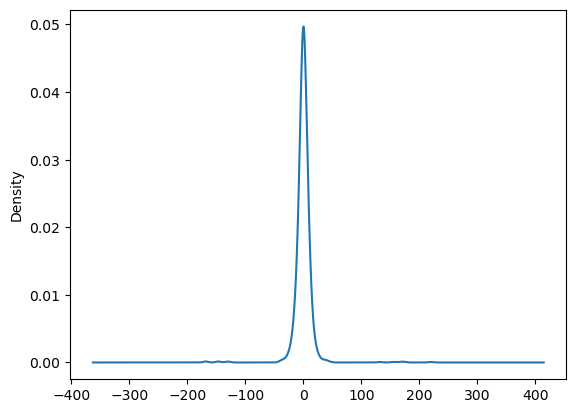

In [344]:
results.resid.plot(kind="density")

In [345]:
start = 1200  # Première période après l'entraînement
end = start + 1257 # Prédire 10 périodes en avance
predictions = results.predict(start=start, end=end)
y = data['TSLA']
resultats=pd.DataFrame()
resultats["reel"]=y.values
resultats["pred"]=predictions.round(6).values
resultats

,reel,pred
0,220.220001,242.027077
1,220.220001,243.294574
2,220.220001,239.096940
3,220.220001,222.484619
4,220.220001,219.164258
...,...,...
1253,220.220001,233.704203
1254,220.220001,233.704203
1255,220.220001,233.704203
1256,220.220001,233.704203


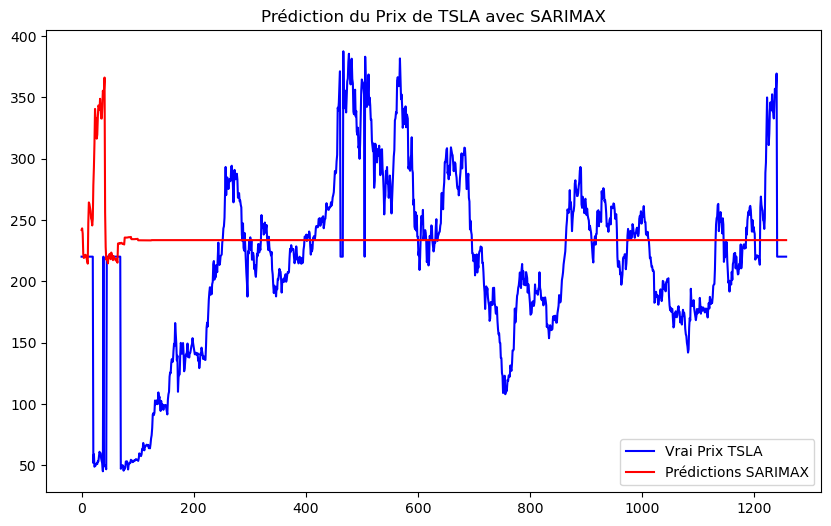

In [346]:
# Affichage des résultats
plt.figure(figsize=(10,6))
plt.plot(resultats["reel"], label="Vrai Prix TSLA", color='blue')
plt.plot(resultats["pred"], label="Prédictions SARIMAX", color='red')
plt.title("Prédiction du Prix de TSLA avec SARIMAX")
plt.legend()
plt.show()

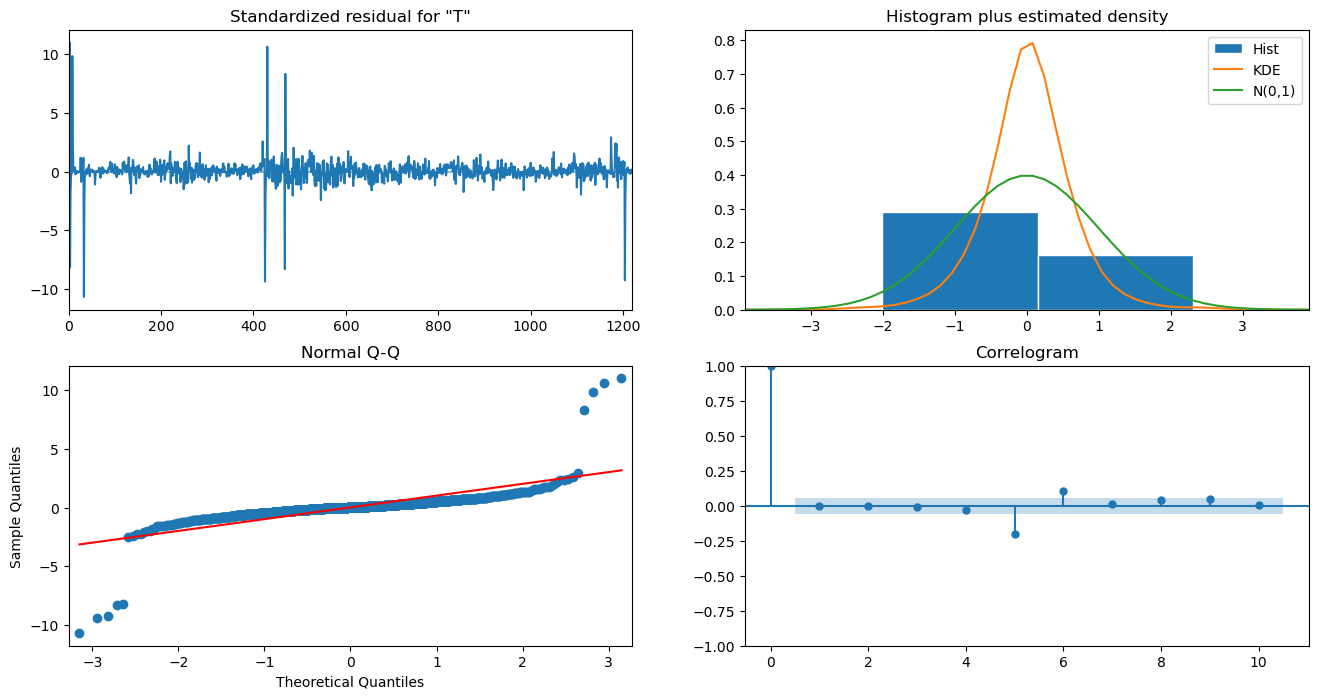

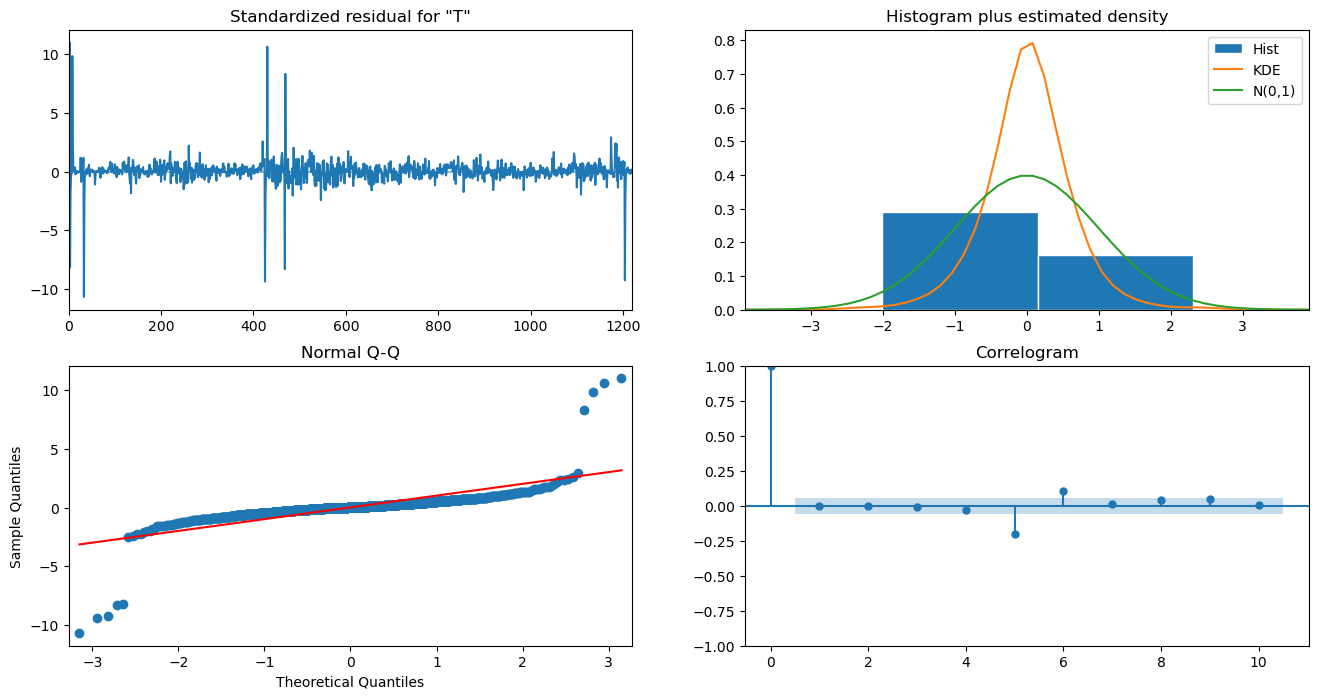

In [347]:
 results.plot_diagnostics(figsize=(16,8))

### 6.6 . Influence des autres actions sur Tesla

In [349]:
data.columns

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'NVDA', 'TSLA'], dtype='object', name='Ticker')

<Axes: >

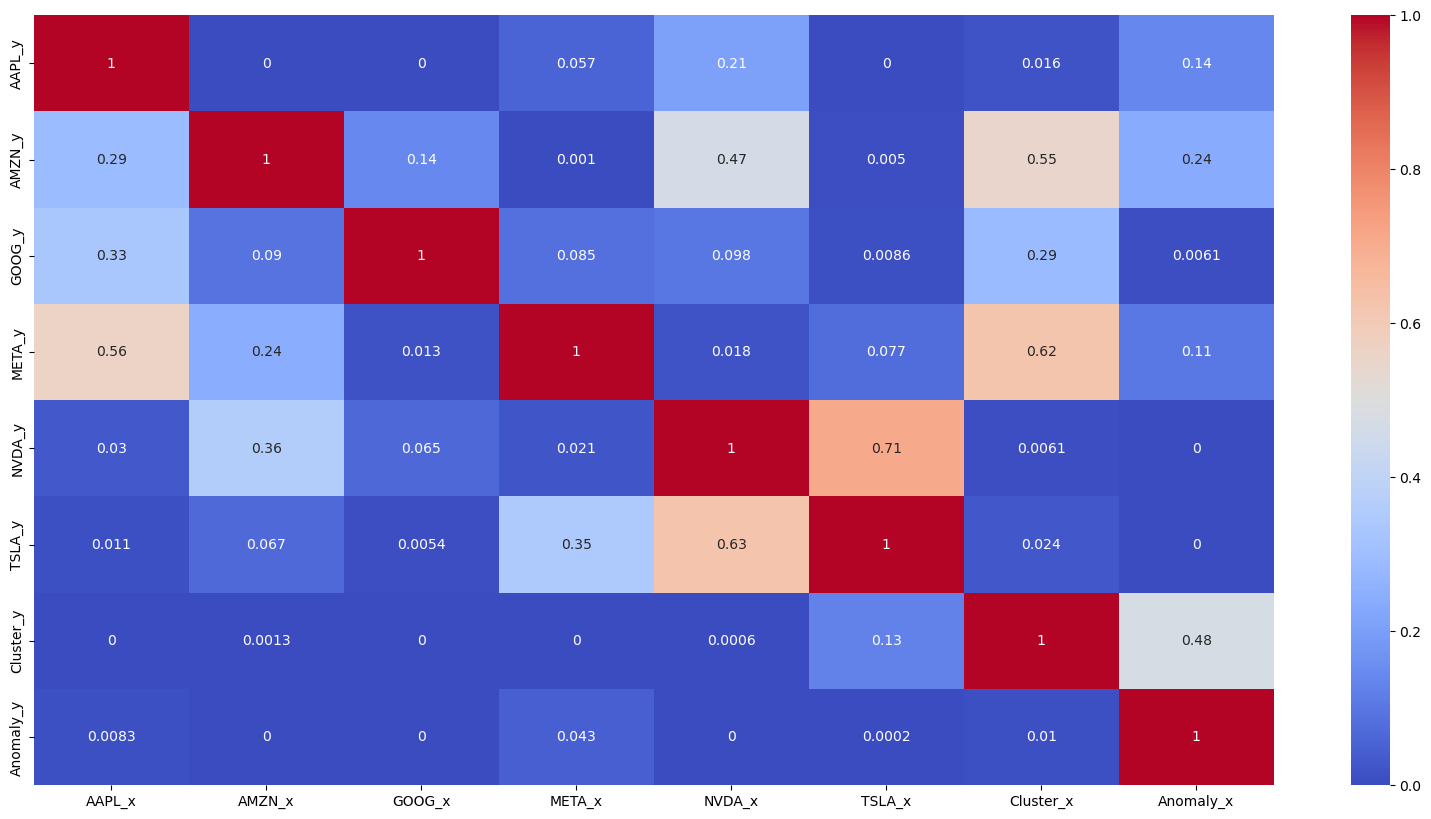

In [350]:
from statsmodels.tsa.stattools import grangercausalitytests


#Matrice de causalité
maxlag=12   #conseil: prenez toujours la frequence de la serie temporelle
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]

    return df
    
data4=data_scaled.select_dtypes(exclude=['object']) # je prends toutes les donnees numeriques
data4=data4.fillna(data4.mean()) # j impute les valeurs manquantes par la moyenne

matrice_causalite=grangers_causation_matrix(data4, variables = data4.columns)
plt.figure(figsize=(20,10))
sns.heatmap(matrice_causalite, annot=True, cmap="coolwarm")

In [351]:
# P values n'est inférieur à 0.05 à aucune des autres variables donc ces variables ne causent pas TESLA 

In [386]:
#variables EXOGENES choisies (on fait un test avec AMAZON car il se rapproche le plus)
#on prend que les variables qui causent TESLA et qui ne creeraient pas d'instabilité à long terme
exog=data[['GOOG','AAPL']].fillna(0)

exog = data[['GOOG','AAPL']]

### 6.7 . Entrainement d'un autre modèle SARIMA

In [389]:
n=12
target = data["TSLA"]
#on prends les 1000 premieres donnees pour le train et 257 pour le test (vous pouvez aussi modifier cette repartition)
train= target.head(1000-n)
test=target.tail(n)

exog_train= exog.head(1000-n) #les 1000 premiers pour entrainer le modele
exog_test=exog.tail(n)     #les 257 derniers pour tester le modele 

In [ ]:
#Un ouveau ARIMA pour le choix des meilleurs paramètres

import pmdarima   #(p,d,q)  #(P,D,Q, s) 

pmdarima.arima.auto_arima(train,                          
                          start_p=0, max_p=12, #chercher le meilleur parametre p entre 0 et 12
                          start_q=0, max_q=12,
                          start_d=0, max_d=12,  
                          start_P=0, max_P=12,
                          start_Q=0, max_Q=12,
                          start_D=0, max_D=12,  
                          m=12)

In [356]:
#le meilleur modele en terme de precision pourrait etre le modele SARIMA avec les paremetres:
#(p,d,q)(P,D,Q)(s)=(0,1,0)(0,0,0)[12]

In [357]:
#entrainement du modèle

# define model configuration
my_order = (p, d, q)
my_seasonal_order = (P, D, Q, s) 


# define model configuration
my_order = (0, 1, 0) #pqd: appliquée à la seried e depart
my_seasonal_order = (0, 1, 0, 12) #PQD et S=saison (tres souvent c'est 12) appliquée à la SAISONNALITE

# define model
model2 = SARIMAX(train,
                 exog=exog_train, #on prend en compte les variables eXogenes
                 order=my_order, 
                 seasonal_order=my_seasonal_order) 

results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               TSLA   No. Observations:                  988
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -4525.443
Date:                            Tue, 18 Mar 2025   AIC                           9054.885
Time:                                    21:55:09   BIC                           9064.650
Sample:                                         0   HQIC                          9058.601
                                            - 988                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AMZN           1.0296      0.219      4.692      0.000       0.600       1.460
sigma2       629.6262      6.932     90.834      0.000     616.040     643.212
===================================================================================
Ljung-Box (L1) (Q):                  46.72   Jarque-Bera (JB):             48709.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [358]:
#regardons si les erreurs sont normales
import scipy.stats as st
st.shapiro(results2.resid)

ShapiroResult(statistic=0.5136238693512354, pvalue=9.903314435054825e-46)

In [359]:
#pvalue<5% donc les erreurs du modele ne sont toujours pas normales
#conclusion: il ne faut pas valider le modele à ce stade, il faut l'ameliorer!

#On pourra tester d'autres paramètres dans SARIMA ou apploiquer des transformations

In [360]:
"""#Transformation logarithmique
train_log = np.log(train + 1)  # Évite les valeurs négatives
exog_train_log = np.log(exog_train + 1)"""

'#Transformation logarithmique\ntrain_log = np.log(train + 1)  # Évite les valeurs négatives\nexog_train_log = np.log(exog_train + 1)'

In [361]:
#différenciation simples
train_diff = train.diff().dropna()
train_diff = train_diff.diff().dropna()

exog_train_diff= exog_train.diff().dropna()
exog_train_diff= exog_train_diff.diff().dropna()

In [362]:
"""#Application de B_COX
from scipy.stats import boxcox
train_boxcox, lambda_bc = boxcox(train + 1)
# Décaler les exogènes si elles ont des valeurs nulles ou négatives
shift_value = abs(exog_train.min().min()) + 1  # Assure que toutes les valeurs sont positives
exog_train_shifted = exog_train + shift_value

# Appliquer Box-Cox sur chaque variable exogène
exog_train_boxcox = exog_train_shifted.apply(lambda x: boxcox(x)[0], axis=0)"""

'#Application de B_COX\nfrom scipy.stats import boxcox\ntrain_boxcox, lambda_bc = boxcox(train + 1)\n# Décaler les exogènes si elles ont des valeurs nulles ou négatives\nshift_value = abs(exog_train.min().min()) + 1  # Assure que toutes les valeurs sont positives\nexog_train_shifted = exog_train + shift_value\n\n# Appliquer Box-Cox sur chaque variable exogène\nexog_train_boxcox = exog_train_shifted.apply(lambda x: boxcox(x)[0], axis=0)'

In [363]:
"""
#recherche des valeurs de P et Q optimaux
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train.diff().dropna(), lags=30)
plot_pacf(train.diff().dropna(), lags=30)
plt.show()
"""

'\n#recherche des valeurs de P et Q optimaux\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf\n\nplot_acf(train.diff().dropna(), lags=30)\nplot_pacf(train.diff().dropna(), lags=30)\nplt.show()\n'

In [364]:
#Re entrainement du modèle
'''
# define model configuration
my_order = (p, d, q)
my_seasonal_order = (P, D, Q, s) 


# define model configuration
my_order = (0, 1, 0) #pqd: appliquée à la seried e depart
my_seasonal_order = (0, 1, 0, 12) #PQD et S=saison (tres souvent c'est 12) appliquée à la SAISONNALITE

# define model
model3 = SARIMAX(train_diff,
                 exog=exog_train_diff, #on prend en compte les variables eXogenes
                 order=my_order, 
                 seasonal_order=my_seasonal_order) 

results3 = model3.fit()
results3.summary()'''

"\n# define model configuration\nmy_order = (p, d, q)\nmy_seasonal_order = (P, D, Q, s) \n\n\n# define model configuration\nmy_order = (0, 1, 0) #pqd: appliquée à la seried e depart\nmy_seasonal_order = (0, 1, 0, 12) #PQD et S=saison (tres souvent c'est 12) appliquée à la SAISONNALITE\n\n# define model\nmodel3 = SARIMAX(train_diff,\n                 exog=exog_train_diff, #on prend en compte les variables eXogenes\n                 order=my_order, \n                 seasonal_order=my_seasonal_order) \n\nresults3 = model3.fit()\nresults3.summary()"

In [365]:
#regardons si les erreurs sont normales
st.shapiro(results2.resid)

ShapiroResult(statistic=0.5136238693512354, pvalue=9.903314435054825e-46)

In [366]:
# Explications
''' On constate que ces transformations ne permettent pas beaucoup d'améliorer le modèle
Par contre plus on améliore les paramètre plus P value devient intéressant'''

" On constate que ces transformations ne permettent pas beaucoup d'améliorer le modèle\nPar contre plus on améliore les paramètre plus P value devient intéressant"

In [367]:
#Explications
'''
On constate qu'avec SARIMAX on ne réussi pas à évaluer correctement le modèle; pour valider le modèle le p value doit être sup à 0.05 et on obtient uniquement
pvalue=7.279584194360453e-08 '''

"\nOn constate qu'avec SARIMAX on ne réussi pas à évaluer correctement le modèle; pour valider le modèle le p value doit être sup à 0.05 et on obtient uniquement\npvalue=7.279584194360453e-08 "

## 6.8 Modèles avancés en Deep Learning (Bonus)

### Expérimentation avec Facebook Prophet

In [370]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [371]:
from prophet import Prophet

# Supposons que 'df' a les dates en index et plusieurs colonnes (META, NVDA, AMZN, TSLA)
df_tesla = data[['TSLA']].reset_index()  # Sélectionner seulement TSLA et remettre la date en colonne
df_tesla

Ticker,Date,TSLA
0,2020-01-02,220.220001
1,2020-01-03,220.220001
2,2020-01-06,220.220001
3,2020-01-07,220.220001
4,2020-01-08,220.220001
...,...,...
1253,2024-12-24,220.220001
1254,2024-12-26,220.220001
1255,2024-12-27,220.220001
1256,2024-12-30,220.220001


In [372]:


# Renommer les colonnes pour Prophet
df_tesla = df_tesla.rename(columns={'Date': 'ds', 'TSLA': 'y'})

# Vérifier le format de la colonne 'ds'
df_tesla['ds'] = pd.to_datetime(df_tesla['ds'])

# Afficher les premières lignes
df_tesla.head()

#entrainement du modèle
model = Prophet()

# Entraîner sur les données Tesla
model.fit(df_tesla)


21:55:19 - cmdstanpy - INFO - Chain [1] start processing
21:55:19 - cmdstanpy - INFO - Chain [1] done processing


In [373]:
#Faire des prédictions

# Générer un DataFrame avec les dates futures ()
future = model.make_future_dataframe(periods=0)

# Prédire les valeurs
forecast = model.predict(future)

# Voir les 5 premières prédictions
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02,139.011663,90.635830,191.402289
1,2020-01-03,141.367130,86.967135,195.353271
2,2020-01-06,149.819134,94.038004,205.868033
3,2020-01-07,151.165218,97.900755,207.342869
4,2020-01-08,153.622931,100.338257,205.723367


In [374]:
#Explication
'''
yhat : la valeur prédite
yhat_lower et yhat_upper : les intervalles de confiance
'''

'\nyhat : la valeur prédite\nyhat_lower et yhat_upper : les intervalles de confiance\n'

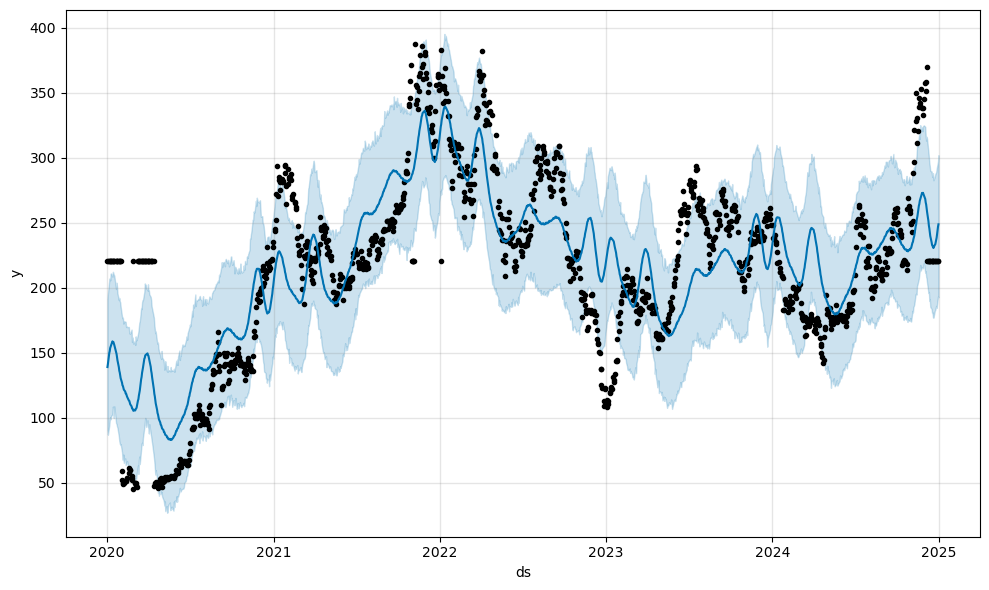

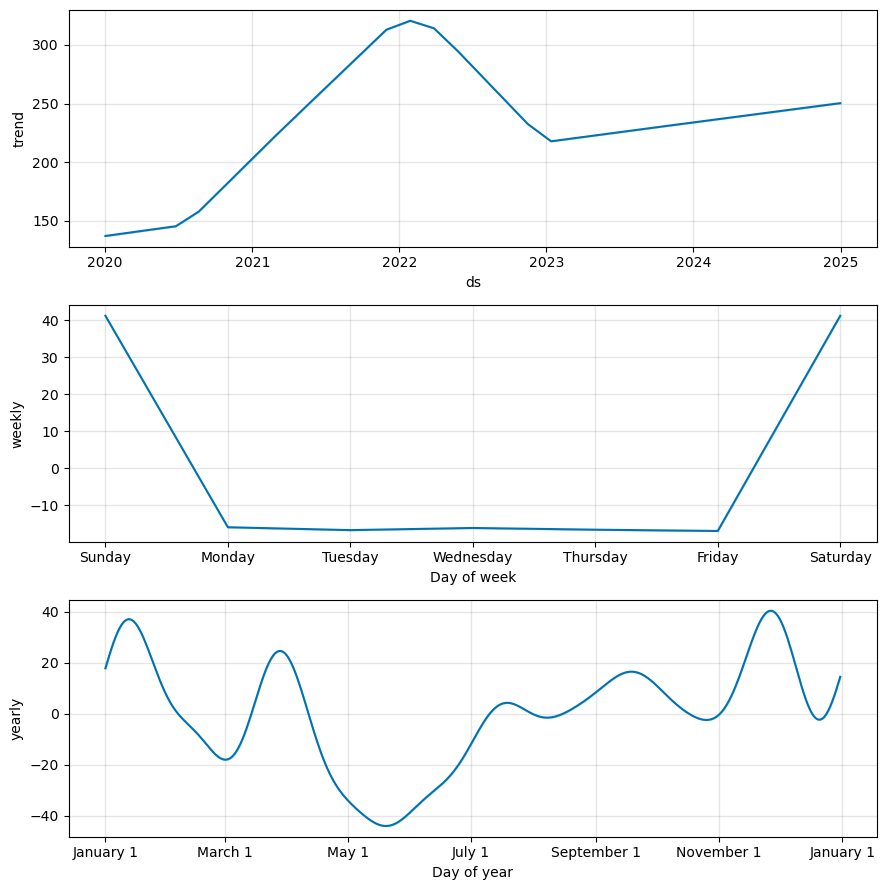

In [375]:
#Visualisation des résultats

import matplotlib.pyplot as plt

# Afficher la prédiction complète
model.plot(forecast)
plt.show()

# Afficher les composantes de la tendance et de la saisonnalité
model.plot_components(forecast)
plt.show()


In [376]:
#Ajout des variables exogènes

'''
# Ajouter une variable exogène (ex: AMZN)
data['AMZN'] = data['AMZN']  # Supposons que tu as une colonne 'AMZN'

# Définir Prophet en incluant cette variable
model = Prophet()
model.add_regressor('AMZN')

# Entraînement du modèle avec la nouvelle variable
model.fit(data)

# Créer un DataFrame pour les prédictions en incluant aussi 'voluAMZN'
future['AMZN'] = data['AMZN'].mean()  # On peut utiliser une moyenne ou des valeurs estimées

# Faire les prédictions avec la nouvelle variable
forecast = model.predict(future)
'''

"\n# Ajouter une variable exogène (ex: AMZN)\ndata['AMZN'] = data['AMZN']  # Supposons que tu as une colonne 'AMZN'\n\n# Définir Prophet en incluant cette variable\nmodel = Prophet()\nmodel.add_regressor('AMZN')\n\n# Entraînement du modèle avec la nouvelle variable\nmodel.fit(data)\n\n# Créer un DataFrame pour les prédictions en incluant aussi 'voluAMZN'\nfuture['AMZN'] = data['AMZN'].mean()  # On peut utiliser une moyenne ou des valeurs estimées\n\n# Faire les prédictions avec la nouvelle variable\nforecast = model.predict(future)\n"

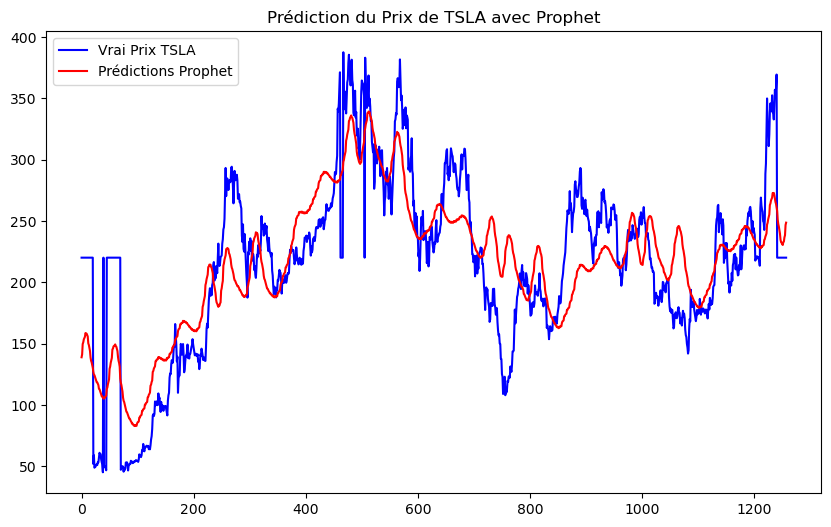

In [377]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Sélectionner les valeurs réelles et prédictions

y_true = df_tesla['y']
y_pred = forecast.iloc[:len(df_tesla)]['yhat']  # Comparer uniquement sur la période d'entraînement

# Affichage des résultats
plt.figure(figsize=(10,6))
plt.plot(y_true, label="Vrai Prix TSLA", color='blue')
plt.plot(y_pred, label="Prédictions Prophet", color='red')
plt.title("Prédiction du Prix de TSLA avec Prophet")
plt.legend()
plt.show()


### 6.9 Testez des architectures LSTM (Long Short-Term Memory) pour la prévision des séries temporelles.

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense, Dropout

# Charger les données (supposons que 'df' contient les cours de clôture de TSLA)
df = data[['TSLA']].copy()  # Sélectionner uniquement la colonne 'TSLA'

# Normalisation des données pour LSTM
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)

# Fonction pour créer des séquences de données (X: historique, Y: valeur future)
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # 60 jours précédents
        y.append(data[i+time_steps])   # Valeur cible (jour suivant)
    return np.array(X), np.array(y)

# Définir le nombre de jours à prendre en compte
time_steps = 60  # Par exemple, on prend 60 jours pour prédire le 61e

# Créer les jeux de données d'entraînement et test
X, y = create_sequences(df_scaled, time_steps)
train_size = int(len(X) * 0.8)  # 80% pour l'entraînement

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape pour LSTM (batch_size, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [380]:
#Construction du modèle

# Construction du modèle LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),  # Première couche LSTM
    Dropout(0.2),  # Réduction du sur-apprentissage
    LSTM(50, return_sequences=True),  
    Dropout(0.2),
    LSTM(50),  # Dernière couche LSTM
    Dropout(0.2),
    Dense(1)  # Couche de sortie pour la prédiction
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - loss: 0.0780 - val_loss: 0.0097
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0127 - val_loss: 0.0091
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0105 - val_loss: 0.0087
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0099 - val_loss: 0.0070
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0098 - val_loss: 0.0063
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0078 - val_loss: 0.0060
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0075 - val_loss: 0.0049
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0078 - val_loss: 0.0045
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step


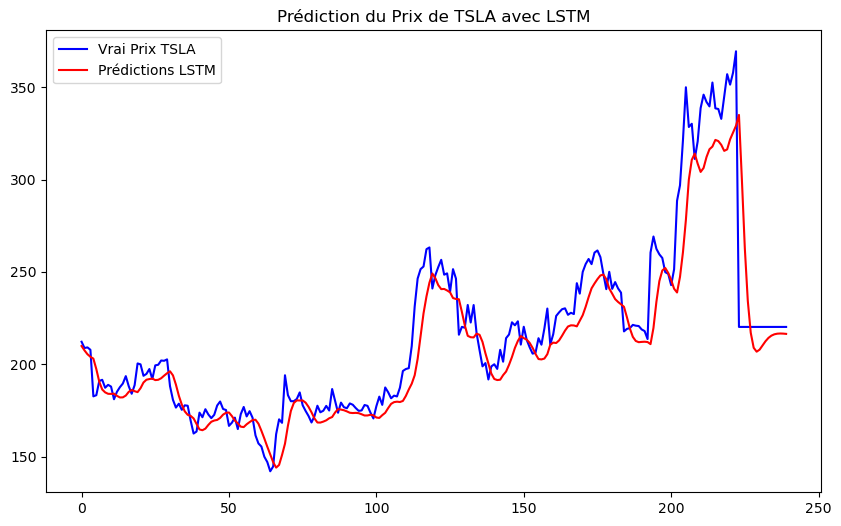

In [381]:
#Visualisation du modèle
# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Inverser la normalisation pour retrouver les vraies valeurs
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Affichage des résultats
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label="Vrai Prix TSLA", color='blue')
plt.plot(y_pred_inv, label="Prédictions LSTM", color='red')
plt.title("Prédiction du Prix de TSLA avec LSTM")
plt.legend()
plt.show()


### 6.10 Comparez la performance des modèles SARIMAX Prophet et LSTM sur la base de métriques comme RMSE, MAE, R².

In [383]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

#SARIMAX
mae_sarimax = mean_absolute_error(resultats["reel"], resultats["pred"])
mse_sarimax = mean_squared_error(resultats["reel"], resultats["pred"])
rmse_sarimax = np.sqrt(mse_sarimax)
smape_sarimax= np.mean(2 * np.abs(resultats["pred"] - resultats["reel"]) / (np.abs(resultats["reel"]) + np.abs(resultats["pred"]) + 1e-8))
r2_sarimax = r2_score(resultats["reel"], resultats["pred"])

print('MAE_sarimax = ', mae_sarimax)
print('MSE_sarimax = ', mse_sarimax)
print('RMSE_sarimax = ', rmse_sarimax) 
print("sMAPE_sarimax =", smape_sarimax)
print(f"R2_sarimax: {r2_sarimax}")



#PROPHET
mae_prophet = mean_absolute_error(y_true, y_pred)
mse_prophet = mean_squared_error(y_true, y_pred)
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(y_true, y_pred)

print(f"MAE_prophet: {mae_prophet}")
print(f"RMSE_prophet: {mse_prophet}")
print(f"RMSE_prophet: {rmse_prophet}")
print(f"R2_prophet: {r2_prophet}")



#LSMT
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2_lstm = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE_lstm: {rmse_lstm}")
print(f"MAE_lstm: {mae_lstm}")
print(f"R²_lstm: {r2_lstm}")



MAE_sarimax =  55.45380255958195
MSE_sarimax =  5999.659513498786
RMSE_sarimax =  77.45746906205228
sMAPE_sarimax = 0.27228751539677504
R2_sarimax: -0.21145829487450984


ValueError: Found input variables with inconsistent numbers of samples: [1258, 240]